## imports

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from forex_python.converter import CurrencyRates
import matplotlib.dates as mdates

import warnings

# Disable the SettingWithCopyWarning warning
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

# Set the default style
plt.style.use('dark_background')

# Set the default figure size
mpl.rcParams['figure.figsize'] = [15.0, 5.0]

## load files

### load kraken

In [2]:
# Load csv files
trades = pd.read_csv('../csv_files/trades.csv')
ledgers = pd.read_csv('../csv_files/ledgers.csv').dropna(subset='txid')

# Modify datetime column type
trades['time'] = pd.to_datetime(trades['time'])
ledgers['time'] = pd.to_datetime(ledgers['time'])

### load exchange rates EUR / USD - DO NOT RUN THIS CELL

In [9]:
# Define the start and end dates for the exchange rates
start_date = '2017-01-01'
end_date = '2023-02-23'

# Use forex-python to retrieve the exchange rates for EUR to USD
c = CurrencyRates()
exchange_rates = {}
for date in pd.date_range(start=start_date, end=end_date, freq='D'):
    rate = c.get_rate('EUR', 'USD', date)
    exchange_rates[date] = rate

# Convert the exchange rates dictionary to a pandas DataFrame
fiat_exchange_rates = pd.DataFrame.from_dict(exchange_rates, orient='index', columns=['EUR/USD'])

In [10]:
fiat_exchange_rates

,EUR/USD
2017-01-01,1.0541
2017-01-02,1.0465
2017-01-03,1.0385
2017-01-04,1.0437
2017-01-05,1.0501
...,...
2023-02-19,1.0625
2023-02-20,1.0674
2023-02-21,1.0664
2023-02-22,1.0644


### export to excel files

In [14]:
# trades.to_excel('../excel_files/trades.xlsx', index=False)
# ledgers.to_excel('../excel_files/ledgers.xlsx', index=False)
# fiat_exchange_rates.to_excel('../excel_files/fiat_exchange_rates.xlsx', index=True, index_label='date')

### load exchange rates EUR/USD from excel

In [16]:
fiat_exchange_rates_COPY = pd.read_excel('../excel_files/fiat_exchange_rates.xlsx', index_col='date')
fiat_exchange_rates_COPY

,EUR/USD
date,
2017-01-01,1.0541
2017-01-02,1.0465
2017-01-03,1.0385
2017-01-04,1.0437
2017-01-05,1.0501
...,...
2023-02-19,1.0625
2023-02-20,1.0674
2023-02-21,1.0664


In [30]:
fiat_exchange_rates_COPY.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2245 non-null   datetime64[ns]
 1   EUR/USD  2245 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.2 KB


## exploratory analysis

In [ ]:
trades.head(5)

In [ ]:
ledgers.head()

In [18]:
fiat_exchange_rates_COPY

,EUR/USD
date,
2017-01-01,1.0541
2017-01-02,1.0465
2017-01-03,1.0385
2017-01-04,1.0437
2017-01-05,1.0501
...,...
2023-02-19,1.0625
2023-02-20,1.0674
2023-02-21,1.0664


In [ ]:
trades.info()

In [ ]:
ledgers.info()

## atom analysis

### get atom transactions


In [84]:
atom_ledgers = ledgers.loc[(ledgers['asset'] == 'ATOM') | (ledgers['asset'] == 'ATOM.S')]
atom_ledgers.head(5)

,txid,refid,time,type,subtype,aclass,asset,amount,fee,balance
116,L3TO7U-PCQW7-PNGZWX,TDMVWC-CIX2C-YIIKM6,2020-09-21 08:16:30,trade,NaN,currency,ATOM,65.000000,0.0,65.000000
120,LT6NLP-EWPYD-YDSLHM,BUF3AWH-V4KSTX-P2EMB5,2020-09-22 13:09:29,transfer,spottostaking,currency,ATOM,-65.000000,0.0,0.000000
121,LYHZWV-D5E4Q-ICI4XU,RUGH2B3-REN66V-FP5FKA,2020-09-22 13:09:31,transfer,stakingfromspot,currency,ATOM.S,65.000000,0.0,65.000000
128,L3LCDY-U7SD6-2ADCDM,STW2XKS-OB5MN-ZASDD6,2020-09-23 14:28:23,staking,NaN,currency,ATOM.S,0.012896,0.0,65.012896
132,LGANRZ-YZOHY-BMK43U,STLJEBS-UJA6B-Q3NOJC,2020-09-27 14:04:30,staking,NaN,currency,ATOM.S,0.049838,0.0,65.062734


In [86]:
atom_staking_rewards = atom_ledgers.loc[(atom_ledgers['asset'] == 'ATOM.S') & (atom_ledgers['type'] == 'staking')]
atom_staking_rewards = atom_staking_rewards.rename(columns={'amount': 'vol', 'asset': 'pair'}).drop('balance', axis=1)
atom_staking_rewards.head(3)

,txid,refid,time,type,subtype,aclass,pair,vol,fee
128,L3LCDY-U7SD6-2ADCDM,STW2XKS-OB5MN-ZASDD6,2020-09-23 14:28:23,staking,NaN,currency,ATOM.S,0.012896,0.0
132,LGANRZ-YZOHY-BMK43U,STLJEBS-UJA6B-Q3NOJC,2020-09-27 14:04:30,staking,NaN,currency,ATOM.S,0.049838,0.0
136,LVAB2Y-ABSJX-5CKE2C,ST2HHZM-J4DST-YQPLQY,2020-09-30 14:04:17,staking,NaN,currency,ATOM.S,0.037407,0.0


In [127]:
atom_trades = trades.loc[(trades['pair'] == 'ATOMEUR') | (trades['pair'] == 'ATOMUSD')]
atom_transactions = pd.concat([atom_trades, atom_staking_rewards])
atom_transactions.sort_values(by='time', ascending = True, inplace=True)
atom_transactions.loc[:, 'date'] = atom_transactions['time'].dt.date
atom_transactions.loc[:, 'date'] = pd.to_datetime(atom_transactions['date'])

# Merge the two DataFrames based on the 'date' column
atom_transactions = pd.merge(atom_transactions, fiat_exchange_rates_COPY, on='date', how='left')

# Create column with price in dollars if transaction was made in euros
atom_transactions['price_USD'] = atom_transactions.apply(lambda row: row['price'] * row['EUR/USD'] if row['pair'] == 'ATOMEUR' else (row['price'] if row['pair'] == 'ATOMUSD' else np.nan), axis=1)

# Create column with cost in dollars if transaction was made in euros
atom_transactions['cost_USD'] = atom_transactions.apply(lambda row: row['cost'] * row['EUR/USD'] if row['pair'] == 'ATOMEUR' else (row['cost'] if row['pair'] == 'ATOMUSD' else np.nan), axis=1)

# Create column with fee in dollars if transaction was made in euros
atom_transactions['fee_USD'] = atom_transactions.apply(lambda row: row['fee'] * row['EUR/USD'] if row['pair'] == 'ATOMEUR' else (row['fee'] if row['pair'] == 'ATOMUSD' else np.nan), axis=1)

# Column for accumulated cost in dollars
cumulative_cost = 0
atom_transactions['cumulative_cost'] = atom_transactions.apply(lambda row: cumulative_cost + row['cost_USD'] + row['fee_USD'] if row['type'] == 'buy' else (cumulative_cost - row['cost_USD'] + row['fee_USD'] if row['type'] == 'sell' else (cumulative_cost if row['type'] == 'staking' else np.nan)), axis=1).cumsum()

# Column for accumulated coins holding
cumulative_coins = 0
atom_transactions['cumulative_coins'] = atom_transactions.apply(lambda row: cumulative_coins + row['vol'] if row['type'] == 'buy' else (cumulative_coins - row['vol'] if row['type'] == 'sell' else (cumulative_coins + row['vol'] if row['type'] == 'staking' else np.nan)), axis=1).cumsum()
atom_transactions

# Mean purchase price
atom_transactions['mean_purchase_price'] = atom_transactions.apply(lambda row: row['cumulative_cost'] / row['cumulative_coins'] if row['cumulative_cost'] > 0 else 0, axis=1)
atom_transactions

,txid,ordertxid,pair,time,type,ordertype,price,cost,fee,vol,...,subtype,aclass,date,EUR/USD,price_USD,cost_USD,fee_USD,cumulative_cost,cumulative_coins,mean_purchase_price
0,TDMVWC-CIX2C-YIIKM6,OJBYST-3TLLY-2KG3AT,ATOMEUR,2020-09-21 08:16:30.997700,buy,limit,3.82,248.3,0.39728,65.000000,...,NaN,NaN,2020-09-21,1.1787,4.502634,292.67121,0.468274,293.139484,65.000000,4.509838
1,L3LCDY-U7SD6-2ADCDM,NaN,ATOM.S,2020-09-23 14:28:23.000000,staking,NaN,NaN,NaN,0.00000,0.012896,...,NaN,currency,2020-09-23,1.1692,NaN,NaN,NaN,293.139484,65.012896,4.508944
2,LGANRZ-YZOHY-BMK43U,NaN,ATOM.S,2020-09-27 14:04:30.000000,staking,NaN,NaN,NaN,0.00000,0.049838,...,NaN,currency,2020-09-27,1.1634,NaN,NaN,NaN,293.139484,65.062734,4.505490
3,LVAB2Y-ABSJX-5CKE2C,NaN,ATOM.S,2020-09-30 14:04:17.000000,staking,NaN,NaN,NaN,0.00000,0.037407,...,NaN,currency,2020-09-30,1.1708,NaN,NaN,NaN,293.139484,65.100141,4.502901
4,L6HC6S-5VCIZ-DN4LMD,NaN,ATOM.S,2020-10-04 14:04:09.000000,staking,NaN,NaN,NaN,0.00000,0.049905,...,NaN,currency,2020-10-04,1.1730,NaN,NaN,NaN,293.139484,65.150046,4.499452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,LULB4M-P2WYM-FAGQGF,NaN,ATOM.S,2023-01-26 04:02:56.000000,staking,NaN,NaN,NaN,0.00000,0.239865,...,NaN,currency,2023-01-26,1.0895,NaN,NaN,NaN,1088.912214,135.959248,8.009107
184,LDM64H-QA7MD-BY7EFM,NaN,ATOM.S,2023-02-02 03:11:55.000000,staking,NaN,NaN,NaN,0.00000,0.208086,...,NaN,currency,2023-02-02,1.0988,NaN,NaN,NaN,1088.912214,136.167334,7.996868
185,LKYO7K-EBACY-AYCOMY,NaN,ATOM.S,2023-02-09 03:11:29.000000,staking,NaN,NaN,NaN,0.00000,0.208405,...,NaN,currency,2023-02-09,1.0771,NaN,NaN,NaN,1088.912214,136.375739,7.984648
186,LE5XAA-SLSSE-X6V4JR,NaN,ATOM.S,2023-02-16 03:12:06.000000,staking,NaN,NaN,NaN,0.00000,0.208726,...,NaN,currency,2023-02-16,1.0700,NaN,NaN,NaN,1088.912214,136.584465,7.972446


### atom plots

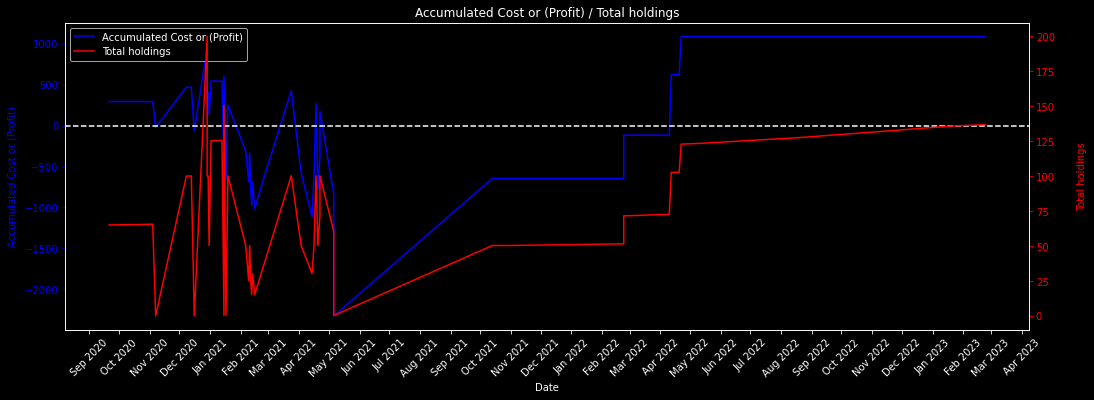

In [209]:
# Crear el gráfico
fig, ax1 = plt.subplots()

# Agregar la primera línea de datos
line1, = ax1.plot(atom_transactions['date'], atom_transactions['cumulative_cost'], 'b', label='Accumulated Cost or (Profit)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Accumulated Cost or (Profit)', color='b')
ax1.tick_params('y', colors='b')

# Crear el segundo eje Y y agregar la segunda línea de datos
ax2 = ax1.twinx()
line2, = ax2.plot(atom_transactions['date'], atom_transactions['cumulative_coins'], 'r', label='Total holdings')
ax2.set_ylabel('Total holdings', color='r')
ax2.tick_params('y', colors='r')

# Personalizar el gráfico
fig.tight_layout()
plt.title('Accumulated Cost or (Profit) / Total holdings')

# Agregar la leyenda
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Agregar líneas horizontales
ax1.axhline(y=0, color='w', linestyle='--')

# Personalizar las etiquetas del eje X
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.tick_params(axis='x', labelrotation=45)

# Personalizar la posición de las etiquetas
ax1.yaxis.set_label_coords(-0.05, 0.5)
ax2.yaxis.set_label_coords(1.05, 0.5)

plt.show()

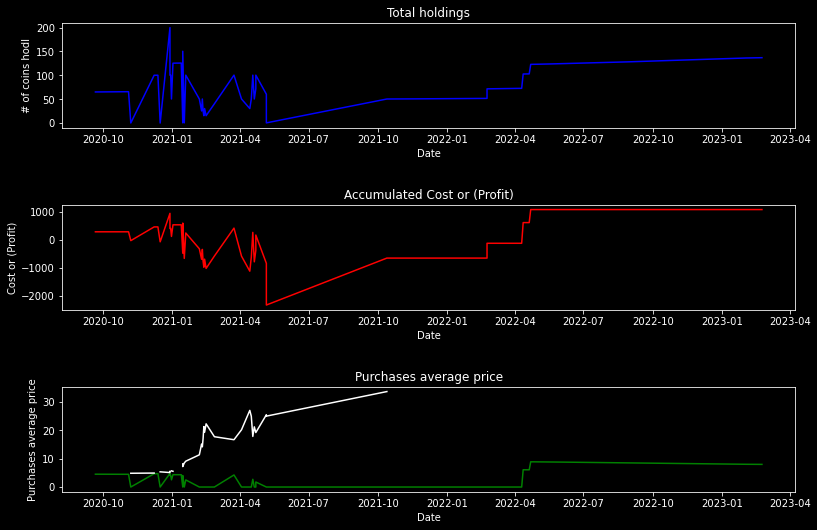

In [227]:
# Crear el gráfico con subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Graficar en el primer subplot
axs[0].plot(atom_transactions['date'], atom_transactions['cumulative_coins'], color='blue')
axs[0].set_title('Total holdings')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('# of coins hodl')

# Graficar en el segundo subplot
axs[1].plot(atom_transactions['date'], atom_transactions['cumulative_cost'], color='red')
axs[1].set_title('Accumulated Cost or (Profit)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Cost or (Profit)')

# Graficar en el segundo subplot
axs[2].plot(atom_transactions['date'], atom_transactions['mean_purchase_price'], color='g')
axs[2].plot(atom_transactions['date'], atom_transactions['price_USD'], color='w')
axs[2].set_title('Purchases average price')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Purchases average price')

# Personalizar el espaciado entre subplots
fig.tight_layout(pad=3.0)

# Mostrar el gráfico
plt.show()

## btc analysis

### get bitcoin transactions

In [253]:
btc_ledgers = ledgers.loc[(ledgers['asset'] == 'XXBT') | (ledgers['asset'] == 'XBT.M')]
btc_ledgers

,txid,refid,time,type,subtype,aclass,asset,amount,fee,balance
2,LXR3M7-5ATPI-YYX3RN,TCJS6F-WBDUN-LQRN6K,2017-11-21 12:43:28,trade,NaN,currency,XXBT,0.040000,0.00000,0.040000
6,LQ7BAX-BXGJA-PPKEHL,TW3ZH3-WC4QB-4UMPFH,2017-11-27 14:26:06,trade,NaN,currency,XXBT,0.025000,0.00000,0.065000
12,LUJO3O-TJKFK-E4WU66,TCZ7ZN-WXT7M-WTERFF,2017-11-29 09:39:57,trade,NaN,currency,XXBT,0.192500,0.00000,0.257500
16,LEAM42-NPHV2-MK7A3B,TX4SWQ-S37YS-L5LDLR,2017-11-29 10:41:58,trade,NaN,currency,XXBT,0.192500,0.00000,0.450000
20,LT3VSB-JIQ5F-VLXGFS,TDFPGE-ELTOQ-YIM7EE,2017-11-30 12:00:00,trade,NaN,currency,XXBT,0.500000,0.00000,0.950000
...,...,...,...,...,...,...,...,...,...,...
2342,LVF5WV-3UDDI-JNAAOM,ST6CJFV-XK76I-PMYTNK,2022-06-27 14:15:14,staking,NaN,currency,XBT.M,0.000010,0.00000,0.350484
2350,LBTSR2-7UO7M-637XLT,BWBSYRR-ESRMAK-N66F6B,2022-06-29 15:37:15,transfer,stakingtospot,currency,XBT.M,-0.350484,0.00000,0.000000
2352,LNYVKP-ZXDTU-ME5W7L,RWCIKZE-KDUVML-L6R45H,2022-06-29 15:39:54,transfer,spotfromstaking,currency,XXBT,0.350484,0.00000,0.388493
2354,LBIX5Z-4KVM5-7QM62R,AGBMMAS-DA4XFD-7QTLSI,2022-06-29 15:53:20,withdrawal,NaN,currency,XXBT,-0.388480,0.00001,0.000003


In [237]:
btc_staking_rewards = btc_ledgers.loc[(btc_ledgers['asset'] == 'XBT.M') & (btc_ledgers['type'] == 'staking')]
btc_staking_rewards = btc_staking_rewards.rename(columns={'amount': 'vol', 'asset': 'pair'}).drop('balance', axis=1)
btc_staking_rewards

,txid,refid,time,type,subtype,aclass,pair,vol,fee
345,LD4GVM-V6JYU-DEDEK5,ST7KOMS-7OIBV-ADHLOQ,2020-12-31 14:29:51,staking,NaN,currency,XBT.M,0.000003,0.0
357,L62KWG-J4ZIA-ZNWOIO,ST2BXRU-6I74C-MSURV4,2021-01-04 14:07:55,staking,NaN,currency,XBT.M,0.000021,0.0
371,LIEOFT-U3MPQ-OPQFGU,ST7PTCI-BQHTE-L2CJJL,2021-01-07 14:08:09,staking,NaN,currency,XBT.M,0.000016,0.0
391,LOU6SV-UTIVB-QYSLIF,ST6NX3W-NE4XH-NZSQTV,2021-01-11 14:08:37,staking,NaN,currency,XBT.M,0.000021,0.0
403,LY5XHA-5MOXE-EFLOQR,ST55K4H-RAG6B-HMG5TF,2021-01-14 14:08:45,staking,NaN,currency,XBT.M,0.000016,0.0
...,...,...,...,...,...,...,...,...,...
2286,LBN6MM-HHBYE-FCAQCE,STGLCV5-EY2WZ-IERQNJ,2022-06-13 14:17:27,staking,NaN,currency,XBT.M,0.000010,0.0
2298,L52IEW-BQ5BP-XFRWT3,STTFYKX-QLPRN-XFUGKX,2022-06-16 14:12:58,staking,NaN,currency,XBT.M,0.000007,0.0
2314,LLCFMX-IFQJ3-WJ7NTH,ST2UG64-5Z7VN-5NPPDA,2022-06-20 14:14:38,staking,NaN,currency,XBT.M,0.000010,0.0
2326,L6MXL3-3FROG-CFMNZN,ST7OFG5-AEPRG-JAFEFA,2022-06-23 14:12:24,staking,NaN,currency,XBT.M,0.000007,0.0


In [250]:
btc_withdrawals = btc_ledgers.loc[(btc_ledgers['asset'] == 'XXBT') & (btc_ledgers['type'] == 'withdrawal')]
btc_withdrawals = btc_withdrawals.rename(columns={'amount': 'vol', 'asset': 'pair'}).drop('balance', axis=1)
btc_withdrawals['vol'] = btc_withdrawals['vol'] * -1
btc_withdrawals

,txid,refid,time,type,subtype,aclass,pair,vol,fee
69,L2DS2J-OMUD6-CIHTIF,AGBTZQB-64RSUK-PLRL7L,2018-01-05 12:51:44,withdrawal,NaN,currency,XXBT,0.53030,0.00100
642,L5QCDV-BR2EL-ZZBXTJ,AGBG77E-WYDXYF-PZHUOX,2021-02-24 09:54:33,withdrawal,NaN,currency,XXBT,0.76000,0.00015
2354,LBIX5Z-4KVM5-7QM62R,AGBMMAS-DA4XFD-7QTLSI,2022-06-29 15:53:20,withdrawal,NaN,currency,XXBT,0.38848,0.00001


In [289]:
btc_trades = trades.loc[(trades['pair'] == 'XXBTZEUR') | (trades['pair'] == 'XXBTZUSD') | (trades['pair'] == 'EOSXBT') | (trades['pair'] == 'XETHXXBT')]
btc_transactions = pd.concat([btc_trades, btc_staking_rewards, btc_withdrawals])
btc_transactions.sort_values(by='time', ascending = True, inplace=True)
btc_transactions.loc[:, 'date'] = btc_transactions['time'].dt.date
btc_transactions.loc[:, 'date'] = pd.to_datetime(btc_transactions['date'])

# Merge the two DataFrames based on the 'date' column
btc_transactions = pd.merge(btc_transactions, fiat_exchange_rates_COPY, on='date', how='left')

# Create column with price in dollars if transaction was made in euros
btc_transactions['price_USD'] = btc_transactions.apply(lambda row: row['price'] * row['EUR/USD'] if row['pair'] == 'XXBTZEUR' else (row['price'] if row['pair'] == 'XXBTZUSD' else np.nan), axis=1)

# Create column with cost in dollars if transaction was made in euros
btc_transactions['cost_USD'] = btc_transactions.apply(lambda row: row['cost'] * row['EUR/USD'] if row['pair'] == 'XXBTZEUR' else (row['cost'] if row['pair'] == 'XXBTZUSD' else np.nan), axis=1)

# Create column with fee in dollars if transaction was made in euros
btc_transactions['fee_USD'] = btc_transactions.apply(lambda row: row['fee'] * row['EUR/USD'] if row['pair'] == 'XXBTZEUR' else (row['fee'] if row['pair'] == 'XXBTZUSD' else np.nan), axis=1)

# Column for accumulated cost in dollars
cumulative_cost = 0
btc_transactions['cumulative_cost'] = btc_transactions.apply(lambda row: cumulative_cost + row['cost_USD'] + row['fee_USD'] if row['type'] == 'buy' else ((cumulative_cost - (cumulative_cost * (row['cost'] + row['fee'])) if row['pair'] == 'EOSXBT' else (cumulative_cost - row['cost_USD'] + row['fee_USD'] if ((row['type'] == 'sell') & ((row['pair'] == 'XXBTZUSD') | (row['pair'] == 'XXBTZEUR'))) else (cumulative_cost if row['type'] == 'staking' else np.nan)))), axis=1).cumsum()

# Column for accumulated coins holding
cumulative_coins = 0
btc_transactions['cumulative_coins'] = btc_transactions.apply(lambda row: cumulative_coins + row['vol'] if row['type'] == 'buy' else (cumulative_coins - row['cost'] + row['fee']) if row['pair'] == 'EOSXBT' else (cumulative_coins - row['vol'] if row['type'] == 'sell' else (cumulative_coins + row['vol'] if row['type'] == 'staking' else (cumulative_coins - row['vol'] if row['type'] == 'withdrawal' else np.nan))), axis=1).cumsum()
btc_transactions

# Mean purchase price
btc_transactions['mean_purchase_price'] = btc_transactions.apply(lambda row: row['cumulative_cost'] / row['cumulative_coins'] if row['cumulative_cost'] > 0 else 0, axis=1)
btc_transactions.head(55)

,txid,ordertxid,pair,time,type,ordertype,price,cost,fee,vol,...,subtype,aclass,date,EUR/USD,price_USD,cost_USD,fee_USD,cumulative_cost,cumulative_coins,mean_purchase_price
0,TCJS6F-WBDUN-LQRN6K,OP2Y4O-BFP6W-SPSNVD,XXBTZEUR,2017-11-21 12:43:28.573200,buy,limit,6940.000000,277.600000,0.444160,0.040000,...,NaN,NaN,2017-11-21,1.1718,8132.29200,325.291680,0.520467,325.812147,0.040000,8145.303667
1,TW3ZH3-WC4QB-4UMPFH,OFXODF-H2DI4-5SGEVR,XXBTZEUR,2017-11-27 14:26:06.198100,buy,limit,8000.000000,200.000000,0.320000,0.025000,...,NaN,NaN,2017-11-27,1.1952,9561.60000,239.040000,0.382464,565.234611,0.065000,8695.917088
2,TCZ7ZN-WXT7M-WTERFF,ORN74E-WRP24-4TH35S,XXBTZEUR,2017-11-29 09:39:57.617800,buy,market,8975.000000,1727.687500,4.491990,0.192500,...,NaN,NaN,2017-11-29,1.1827,10614.73250,2043.336006,5.312677,2613.883294,0.257500,10151.003082
3,TX4SWQ-S37YS-L5LDLR,OISIDH-INCKU-7W5LPD,XXBTZEUR,2017-11-29 10:41:58.460500,buy,limit,9100.000000,1751.750000,2.802800,0.192500,...,NaN,NaN,2017-11-29,1.1827,10762.57000,2071.794725,3.314872,4688.992890,0.450000,10419.984200
4,TDFPGE-ELTOQ-YIM7EE,OTNNAJ-PL3IA-EUBVQU,XXBTZEUR,2017-11-30 12:00:00.206500,buy,limit,8320.000000,4160.000000,6.656000,0.500000,...,NaN,NaN,2017-11-30,1.1849,9858.36800,4929.184000,7.886694,9626.063584,0.950000,10132.698510
5,TTH37D-EI26F-NN62Z5,OSSDEQ-BMCWZ-F4TM2R,XXBTZEUR,2017-11-30 12:02:40.286600,buy,limit,8281.300000,331.252000,0.530000,0.040000,...,NaN,NaN,2017-11-30,1.1849,9812.51237,392.500495,0.627997,10019.192076,0.990000,10120.396037
6,TMDVAU-SCSZG-KYLWIU,O2HLSB-ZEU7S-E4XBH7,XXBTZEUR,2017-12-10 20:15:24.550500,buy,limit,12749.000000,567.113770,1.474500,0.044483,...,NaN,NaN,2017-12-10,1.1742,14969.87580,665.904989,1.731358,10686.828423,1.034483,10330.598398
7,T5Y2WP-5UJWK-DYVCAM,O2HLSB-ZEU7S-E4XBH7,XXBTZEUR,2017-12-10 20:15:24.656500,buy,limit,12749.900000,389.088700,1.011630,0.030517,...,NaN,NaN,2017-12-10,1.1742,14970.93258,456.867952,1.187856,11144.884230,1.065000,10464.680029
8,T2ML5N-GGKNN-KVT4GQ,OVY6L4-44O6E-AS5SXH,EOSXBT,2017-12-14 08:51:44.151400,sell,limit,0.000485,0.006166,0.000016,12.710597,...,NaN,NaN,2017-12-14,1.1845,NaN,NaN,NaN,11144.884230,1.058850,10525.459666
9,TBIFJ3-4SOUU-CQQXMA,OVY6L4-44O6E-AS5SXH,EOSXBT,2017-12-14 08:51:44.164600,sell,limit,0.000485,0.025225,0.000066,52.010293,...,NaN,NaN,2017-12-14,1.1845,NaN,NaN,NaN,11144.884230,1.033691,10781.643022


### plot bitcoin transactions

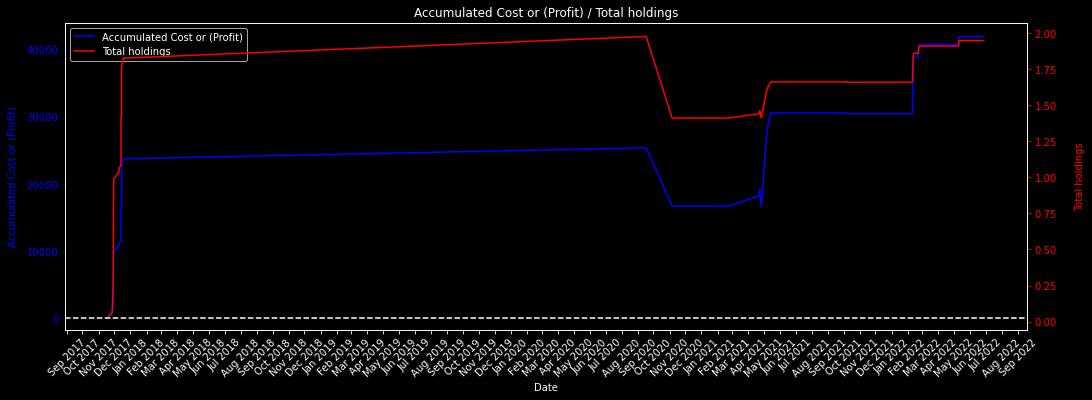

In [239]:
# Crear el gráfico
fig, ax1 = plt.subplots()

# Agregar la primera línea de datos
line1, = ax1.plot(btc_transactions['date'], btc_transactions['cumulative_cost'], 'b', label='Accumulated Cost or (Profit)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Accumulated Cost or (Profit)', color='b')
ax1.tick_params('y', colors='b')

# Crear el segundo eje Y y agregar la segunda línea de datos
ax2 = ax1.twinx()
line2, = ax2.plot(btc_transactions['date'], btc_transactions['cumulative_coins'], 'r', label='Total holdings')
ax2.set_ylabel('Total holdings', color='r')
ax2.tick_params('y', colors='r')

# Personalizar el gráfico
fig.tight_layout()
plt.title('Accumulated Cost or (Profit) / Total holdings')

# Agregar la leyenda
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Agregar líneas horizontales
ax1.axhline(y=0, color='w', linestyle='--')

# Personalizar las etiquetas del eje X
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.tick_params(axis='x', labelrotation=45)

# Personalizar la posición de las etiquetas
ax1.yaxis.set_label_coords(-0.05, 0.5)
ax2.yaxis.set_label_coords(1.05, 0.5)

plt.show()

## deposits / withdrawals

In [ ]:
deposits = ledgers.loc[(ledgers['type'] == 'deposit') & (ledgers['asset'] == 'ZEUR')]
deposits = deposits.copy()
deposits['balance'] = deposits['amount'].cumsum()
display(deposits)
plt.plot(deposits.time, deposits.balance)
plt.show()

In [ ]:
withdrawals = ledgers.loc[(ledgers['type'] == 'withdrawal') & (ledgers['asset'] == 'ZEUR')]
withdrawals = withdrawals.copy()
withdrawals['balance'] = withdrawals['amount'].cumsum()
display(withdrawals)